In [8]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from ucimlrepo import fetch_ucirepo 

# Fetch the dataset 
auto_mpg = fetch_ucirepo(id=9)

# Data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor with a specified number of neighbors (e.g., k=5)
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the train data
y_pred = knn.predict(X_train)

print(y_train[:6])
print(y_pred[:6])

# Evaluate the model's performance (you can use different metrics, such as Mean Squared Error)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse}")

# You can adjust the value of 'n_neighbors' for better performance

#Used the data from https://www.auto-data.net/en/toyota-celica-t18-1.6-sti-105hp-3133 To compare the prediction to the real world. The Prediction is almost spot on to the urban economy
new_data = np.array([[97.7,4,105,2645.55,11,93,2]])

# Use the trained KNN model to make predictions
predicted_values = knn.predict(new_data)

# Print the predicted values
print("Predicted Values:", predicted_values)

      mpg
3    16.0
18   27.0
376  37.0
248  36.1
177  23.0
63   14.0
[[16.8 ]
 [27.  ]
 [32.26]
 [33.74]
 [26.08]
 [15.18]]
Mean Squared Error: 12.910669182389938
Predicted Values: [[28.1]]


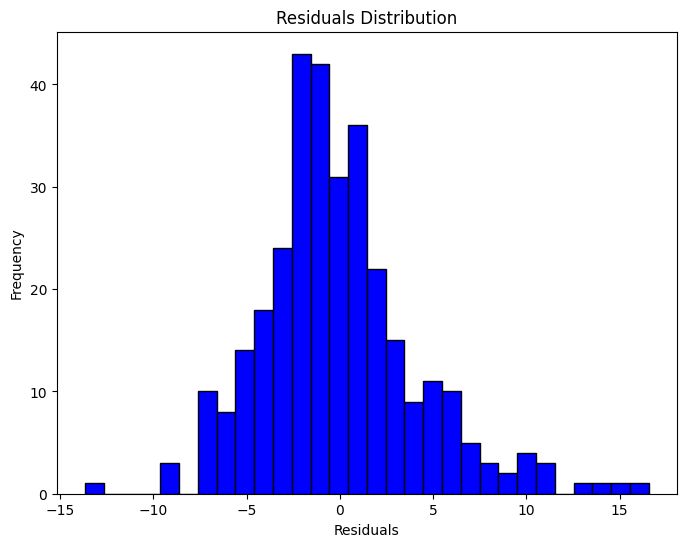

In [14]:
import matplotlib.pyplot as plt

residuals = y_train - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()